In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [23]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value+padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor",
            fontsize=19,
            fontweight='bold',
            color='white',
            family='Comic Sans MS',
        ) 

In [78]:
df = pd.read_csv('atiba.csv')
group_l = df['group'].unique().tolist()
df['name'] = df['name'].str.split().str.join(' ')
df['label'] = np.where(df['goal']==1,"("+df['goal'].astype(str)+") "+df['name'],df['name'])

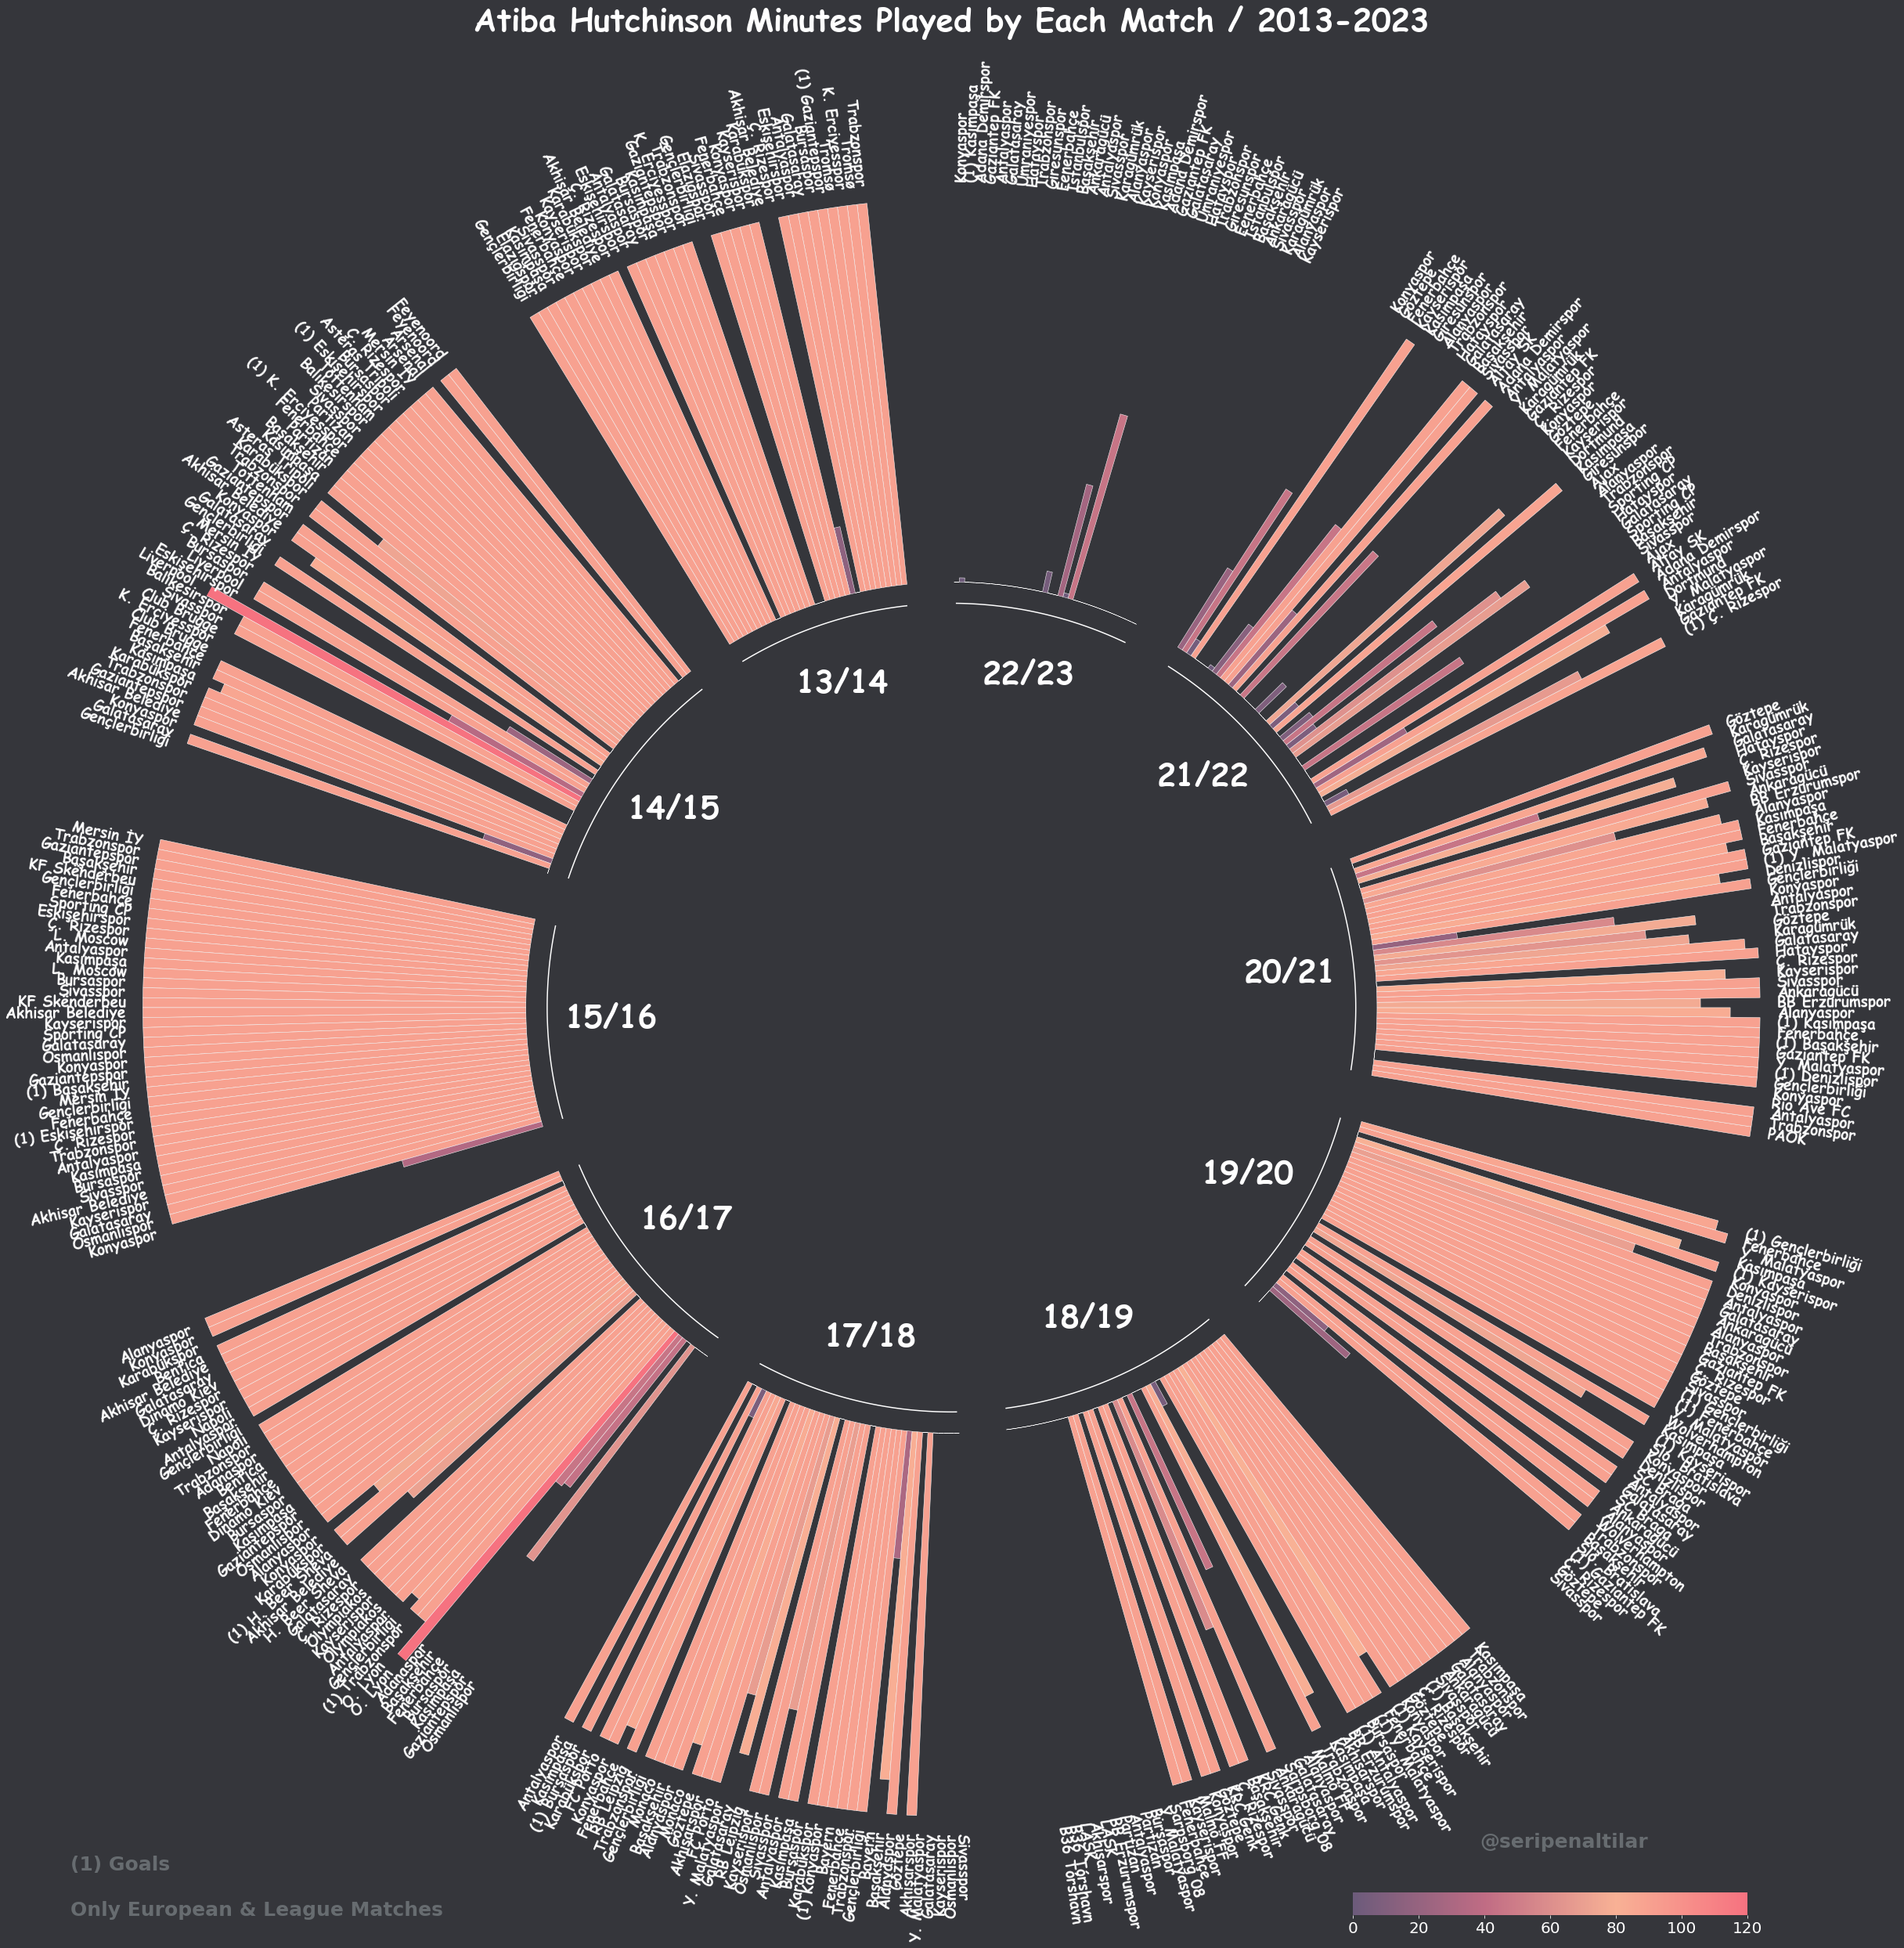

In [80]:
# All this part is like the code above
VALUES = df["value"].values
LABELS = df["label"].values
GROUP = df["group"].values

PAD = 9
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)
OFFSET = np.pi / 2

offset = 0
IDXS = []
GROUPS_SIZE = [36, 48, 40, 46, 42, 46, 40, 42, 44, 36]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(50, 40), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])
fig.patch.set_facecolor('#35363b')
ax.set_facecolor(color='#35363b')

GROUPS_SIZE = [36, 48, 40, 46, 42, 46, 40, 42, 44, 36]
#COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Colors
COLORS = ["#6C5B7B","#C06C84","#F8B195","#F67280"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=VALUES.min(), vmax=VALUES.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(VALUES))

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=0.5
)

VALUES2 = df["value_2"].values

add_labels(ANGLES[IDXS], VALUES2, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(group_l, GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="white")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="white", fontsize=40, 
        fontweight="bold", ha="center", va="center",family='Comic Sans MS'
    )
    
    # Add reference lines at 20, 40, 60, and 80
    #x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    #ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    #ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    #ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    #ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    #ax.plot(x2, [100] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

cbaxes = inset_axes(
    ax, 
    width="40%", 
    height="100%", 
    loc="center",
    bbox_to_anchor=(0.55, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
) 


# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal"
)

# Remove the outline of the colorbar
cb.outline.set_visible(False)

# Remove tick marks
cb.ax.xaxis.set_tick_params(labelsize=20,colors="white")

ax.set_title('Atiba Hutchinson Minutes Played by Each Match / 2013-2023', y=1.08, pad=-14,size=40,color='white',fontweight='bold',family='Comic Sans MS')
plt.figtext(0.70,0.13,"@seripenaltilar",fontsize=25,fontweight='bold',color='#676c70')
plt.figtext(0.20,0.12,"(1) Goals",fontsize=25,fontweight='bold',color='#676c70')
plt.figtext(0.20,0.1,"Only European & League Matches",fontsize=25,fontweight='bold',color='#676c70')
plt.show()
